# Oleksandr Borysiuk [Solutions 1]

## Problem 1

You are given “iris_pasaport_applications.xlsx" file which contains irish passaport applications for the first time and renewal. Using this file reproduce the figure given below. Use background color as #FEF2E6 . For the colors on the bars use #D7CDC3 and #FB78A4

<center><img src="img/hw1_t1.png" height=400/></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
data = pd.read_excel('./data/iris_pasaport_applications.xlsx')

def problem1():

    # creating plot's figure and axes objects. setting dpi and background color
    fig, ax = plt.subplots(dpi=120, facecolor="#FEF2E6")
    # axisbelow makes grid lines below data points, setting axes obj color
    ax.set(axisbelow=True, facecolor="#FEF2E6")
    # positioning yaxis ticks and labels
    ax.yaxis.set_ticks_position('right')
    # setting formatter for major ticklabels
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
    # making ticks invisible, setting text size 
    ax.tick_params(bottom=False, right=False, labelsize=7, pad=-1)
    # for borderless axes
    ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    # setting grid to be visible, and y-only lines
    ax.grid(True, 'major', 'y',)

    # bars for Renewal data
    bars_renew = ax.bar(data.Year, data.Renewal, color="#D7CDC3", width=.7)
    # bars for FirstTime stacked on top of Renewal 
    bars_ftime = ax.bar(data.Year, data.FirstTime, bottom=data.Renewal, color="#FB78A4", width=.7)
    # black outline on first and last Renewal patches
    bars_ftime[0].set(ec = 'k', lw=1)
    bars_ftime[-1].set(ec = 'k', lw=1)
    # placing labels inside 1-st bars for each data bar
    ax.bar_label(bars_ftime, ["first time"]+([""]*4), label_type='center', fontsize=7)
    ax.bar_label(bars_renew, ["renewal"]+([""]*4), label_type='center', fontsize=7)

    # annonating first bar
    ax.annotate(text="There were 7.7372 first time\n applications in the year before\n the referendum..",
                xy=(2015, 35000), xytext=(2015, 70000),
                arrowprops=dict(arrowstyle='->', connectionstyle='Arc3, rad=0.2', color='#777', lw=2),
                ha='center', va='center', fontsize=7)
    # annotating last bar
    ax.annotate(text="... in 2019, there\n were over 54.000",
                xy=(bars_ftime[-1].get_x(), 70000), xytext=(2017.1, 90000),
                arrowprops=dict(arrowstyle='->', connectionstyle='Arc3, rad=-0.2', color='#777', lw=2),
                ha='center', va='center', fontsize=7)

    # text for header
    ax.text(0, y=1.15, s="Irish passport applications:", fontweight='bold', fontsize=8, transform=ax.transAxes)
    ax.text(.45, y=1.15, s="a Brexit-fuelled surge", fontsize=8, transform=ax.transAxes)
    ax.text(0, y=1.07, s="Applications from Great Britain-born applicants:", fontsize=9, transform=ax.transAxes, alpha=.7)

    plt.show()

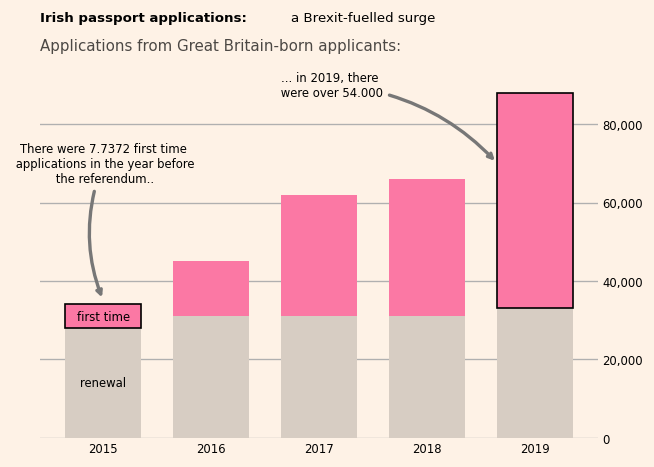

In [2]:
problem1()

## Problem 2

Reproduce the figure which shows a scatter plot for weekly change in mobility vs weekly
change in new covid19 cases.

* country_index=["Chile","India","Canada","France","Italy","US","UK","Israel","Germany"]
* mobility=[-6,-2,-4,-2,-2,-1,3.5,3,2]
* case=[10,50,30,15,-10,5,-10,-30,20]
* colorlist=["navy","cyan","dodgerblue","cyan","cyan","dodgerblue","navy","navy","cyan"]

<center><img src="img/hw1_t2.png" height=400/></center>

In [3]:
def problem2():

    # initial data given
    country_index = ["Chile","India","Canada","France","Italy","US","UK","Israel","Germany"]
    mobility=[-6,-2,-4,-2,-2,-1,3.5,3,2]
    case=[10,50,30,15,-10,5,-10,-30,20]
    colorlist=["navy","cyan","dodgerblue","cyan","cyan","dodgerblue","navy","navy","cyan"]

    # creating plot's figure and axes objects. setting dpi and background color
    fig, ax = plt.subplots(**dict(dpi=120, facecolor="#FEF2E6"))
    # axisbelow makes grid lines below data points, setting axes obj color
    ax.set(axisbelow=True, facecolor="#FEF2E6")
    # hiding ticks lines
    ax.tick_params(left=False, bottom=False)
    # setting spines to be invisible
    ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    # show grid on major ticks
    ax.grid(True, 'major')
    # add x=0 and y=0 lines
    ax.axhline(0, color="#708090"); ax.axvline(0, color="#708090")
    # setting xy label text ticks and limits
    ax.set(ylabel="Weekly change in new cases(%)",
           xlabel="Weekly change in mobility(%)",
           xticks=np.linspace(-10, 10, 5),
           xlim=(-10, 10), ylim=(-60, 60))
    
    # header style text
    ax.text(-.21, y=1.15, s="Countries are seeking to fully reopen while keeping the cases decline", fontsize=9, color='g', transform=ax.transAxes)
    ax.text(-.21, y=1.1, s="Change in mobility levels vs change in new cases (7-day averages)", fontsize=7, transform=ax.transAxes)
    
    # add points to the plot
    ax.scatter(mobility, case, c=colorlist, s=80, alpha=.7)
    # annotation text for each data point
    for x, y, cntry in  zip(mobility, case, country_index):
           ax.text(x, y, cntry, fontsize=7)
    
    # fill 4-th quarter
    ax.fill([0,10,10,0], [0,0,-60,-60], color='g', alpha=.2)
    # add text to the green zone
    ax.text(5, -40, "Target zone", color='green', fontsize=13)

    # legend-like description header
    ax.text(1.5, 60, 'Share of population with at least\none vaccine dose(%)', fontsize=9)
    legend = dict(dodgerblue='40+', navy="20-40", cyan='0-20')
    # legend-like description items add to plot
    for c,s,y in zip(legend.keys(), legend.values(), np.linspace(45, 55, 3)):
           ax.scatter(5.3, y, color=c, marker='o', s=60, alpha=.7)
           ax.text(5.9, y, s, fontsize=7, va='center')
        
    plt.show()

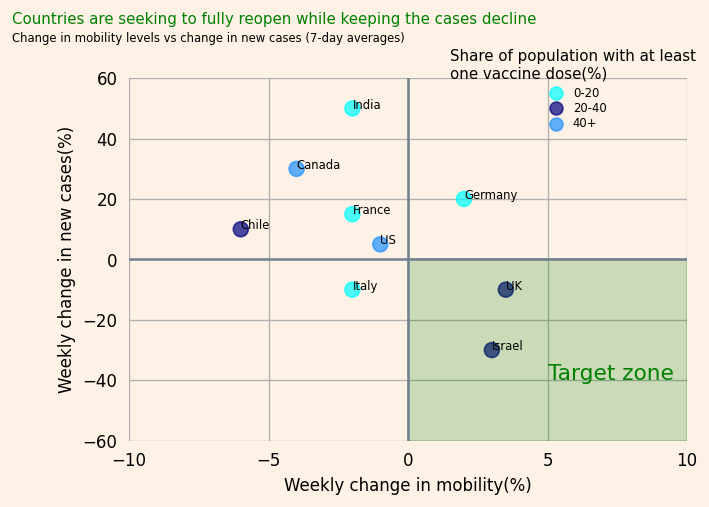

In [4]:
problem2()

## Problem 3

Generate a two-dimensional numpy array of shape 100 by 2 with random integers ranging from 10 to 100. Produce a figure with four subplots of shape 2 by 2

 (1,1) Plot the first column of the random data as a line plot. Set xticks as ranging from 0 to 100 with an interval of 10. Add labels as “Random var 1” and “Value” on the x and y-axis respectively. Give the title of this subplot as “Line Plot”.

 (1,2) Plot the first and second columns of the random data as a scatter plot. Set limits of the axis ranging from 0 to 100 on both axes. Set xticks as ranging from 0 to 100 with an interval of 20. Set yticks as ranging from 0 to 100 with an interval of 25. Plot tick grid lines. Add labels as “Random var 1” and “Random var 2” on the x and y-axis respectively. Give the title of this subplot as “Scatter Plot”.

 (2,1) Plot the histogram of the first column of the random datat. Use the number of bins as 10. Add labels as “Random var 1” and “Frequency” on the x and y-axis respectively. Give the title of this subplot as “Histogram Plot”.

 (2,2) Plot the first 10 rows of the first column as a bar chart. Positions of the bars on the X-axis should go from 1 to 10. You should add labels for each bars. Add labels as “Random var 1” and “value” on the x and y-axis respectively. Give the title of this subplot as “Bar Chart”.

<center><img src="img/hw1_t3.png" height=400/></center>

In [5]:
from matplotlib.ticker import StrMethodFormatter

def problem3():
    # generate data array
    data = np.random.randint(10, 100, (100,2))

    # figure prep. 2x2 grid of subplots will be used
    fig, axs = plt.subplots(2,2, **dict(dpi=100, figsize=(8,6)))

##  Line plot (1,1)
    axs[0, 0].plot(data[:,0])
    axs[0, 0].set(title='Line Plot', xlabel='Random var 1', ylabel='Value', xticks=range(0, 101, 10))

##  Scatter plot (1,2)
    axs[0, 1].scatter(*data.T)
    axs[0, 1].set(title='Scatter Plot', xlabel='Random var 1', ylabel='Random var 2',
                  xticks=range(0, 101, 20), yticks=range(0, 101, 25),
                  xlim=(0,100), ylim=(0,100))
    axs[0, 1].grid(True)

##  Histogram plot (2,1)
    axs[1, 0].hist(data.T[0], bins=10)
    axs[1, 0].set(title='Histogram Plot', xlabel='Random var 1', ylabel='Frequency', yticks=range(0, 16, 5))

##  Bar chart (2,2)
    x=range(1,11)
    axs[1, 1].bar(x, data.T[0,:10])
    axs[1, 1].set(title='Bar Chart', xlabel='Random var 1', ylabel='Value', xticks=x)

    plt.tight_layout()
    plt.show()

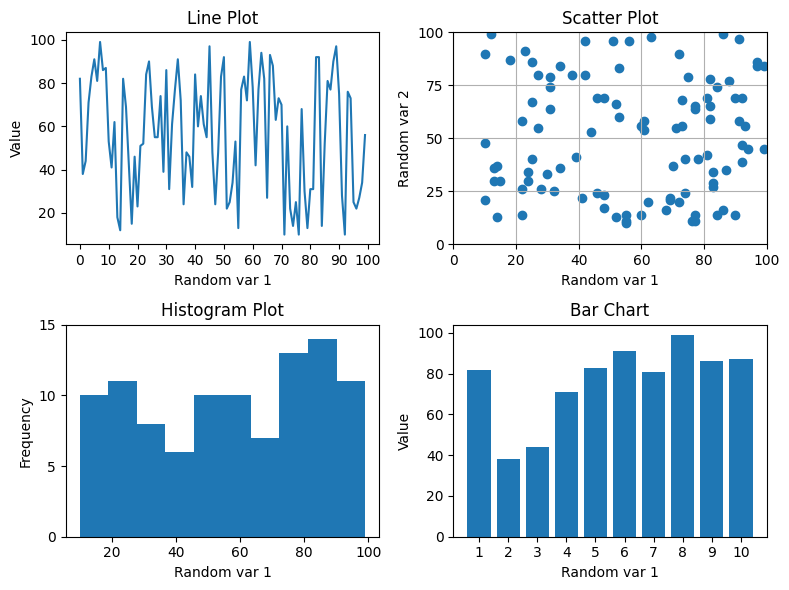

In [6]:
problem3()

## Problem 4

You are given a file named “global-city-population-estimates.xls” which contains population numbers for cities World-wide. The data is given at every 5 years and range from 1950-2030. Using “CITIES-OVER-300K” sheet of this file produce the following figure.

Write a function that takes the file name and year information as the input.

    a) Find the top-10 most populated cities in that year. Plot the result in horizontal bar plot as given upper-left plot of the figure below. (5 Points)
        - Write city and country names inside the bars. Use bigger fontsize for City name.
        - Add year information on the lower-right area of the plot.
        - For xticks label the data as “M” millions.
        - You can use seaborn style for the whole figure.

    b) Plot the population percentages of these top-10 most populated cities in a pie plot. (5 Points)
        - This figure should be located on the upper-right corner of the big figure.

    c) For these top-10 most populated cities plot the population information for the years between 1985-2030. (5 Points)
        - This plot should be located on the lower-left corner of the figure.
        - Sizes of the y-axis of these subplots should be correlated with the difference between maximum and minimum populations for a given city.
        
    d) Repeat the figure in section problem4.c with an only difference which is using the same y-axis size for all subplots. (5 Points)

<center><img src="img/hw1_t4.png" height=700/></center>

In [7]:
from matplotlib.ticker import FuncFormatter

def problem4(file_path, target_year='2010', sheet='CITIES-OVER-300K'):

##  Initial data reading and aggregation
    # read data from given excel file from pre-defined sheet
    data = pd.read_excel(file_path, sheet)
    # gets indecies for records in data DataFrame for top-10 most populated cities in given year. 2010 if not set
    top_pop_idx = data[target_year].sort_values().index[-10:]
    # based on top-10 pop cities indecies separates data that we need to different DataFrame 
    df_top_pop = data.iloc[top_pop_idx][['Country or area', 'Urban Agglomeration', target_year]]
    # setting index and columns for ease of use
    df_top_pop.set_index( pd.Index(range(0,10)), inplace=True)
    df_top_pop.columns = ['country', 'city', 'population']

    # setting style and figure parameters
    plt.style.use('seaborn')
    fig = plt.figure(constrained_layout=True, dpi=110, figsize=(12,10))
    # main figure consists of 2x2 grid of subfigures
    subfigs = fig.subfigures(2, 2, wspace=0.07, height_ratios=[1, 1.3])

##  Horizontal bars chart
    barh_axes = subfigs[0][0].subplots(1,1)
    barh_axes.barh(df_top_pop.index, df_top_pop.population)

    barh_axes.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    barh_axes.yaxis.set_visible(False)
    barh_axes.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: str(int(x)//1000)+'M'))

    for i in df_top_pop.index.values:
        y = df_top_pop.iloc[i,2]
        barh_axes.text(y*.99, i+.1, df_top_pop.iloc[i,1], ha='right')
        barh_axes.text(y*.99, i-.2, df_top_pop.iloc[i,0], ha='right', fontsize=7)

    barh_axes.text(.78, .1, target_year, color='r', fontsize=18, transform=barh_axes.transAxes)

##  Pie chart
    pie_axes = subfigs[0][1].subplots(1,1)
    pie_axes.pie(df_top_pop.population, startangle=90, autopct='%.1f%%', labels=df_top_pop.city)

##  Data prep for plots
    years = [str(y) for y in range(1985, 2031, 5)]
    df_cyp = data.iloc[data.index, 7:].T
    df_cities = data[['Country or area', 'Urban Agglomeration']]
    df_cities.columns = ['country', 'city']
    
    ratios = np.array([])
    for i, city_id,  in enumerate(top_pop_idx):
        mm_dif = df_cyp[city_id][years].max() - df_cyp[city_id][years].min()
        ratios = np.append(ratios, mm_dif)
    ratios /= np.linalg.norm(ratios,2)

##  Subfigure with 10 axes relative height
    rel_pop_sf = subfigs[1][0].subplots(nrows=10, sharex=True, gridspec_kw=dict(height_ratios=ratios))

    for i, city_id,  in enumerate(top_pop_idx):
        rel_pop_sf[i].set(yticks=[])
        rel_pop_sf[i].set_ylabel(df_cities.city[city_id], rotation='horizontal', ha='right', va='center')
        rel_pop_sf[i].plot(years, df_cyp[city_id][years], 'b*-', lw=.8)

##  Subfigure with 10 axes fixed height
    fixd_pop_sf = subfigs[1][1].subplots(nrows=10, sharex=True)

    for i, city_id,  in enumerate(top_pop_idx):
        fixd_pop_sf[i].set(yticks=[])
        fixd_pop_sf[i].set_ylabel(df_cities.city[city_id], rotation='horizontal', ha='right', va='center')
        fixd_pop_sf[i].plot(years, df_cyp[city_id][years], 'b*-', lw=.8)
    
    plt.show()

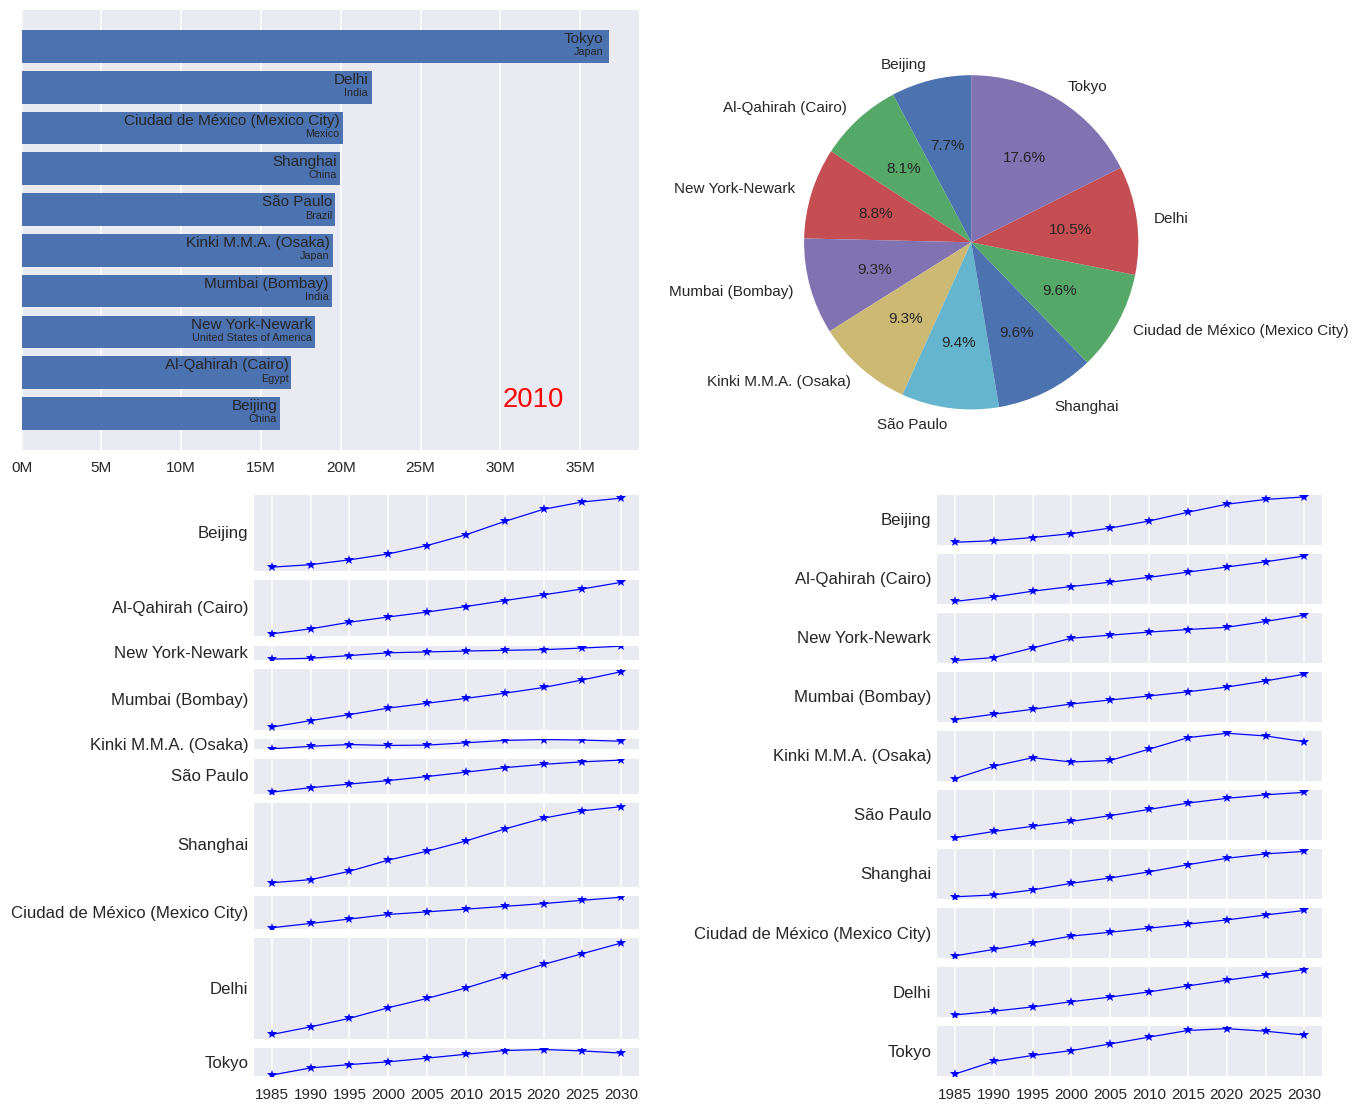

In [8]:
file_path = './data/global-city-population-estimates.xls'
problem4(file_path)